[ 1. -1.]
[[ 0.          0.70710678]
 [ 1.         -0.70710678]]


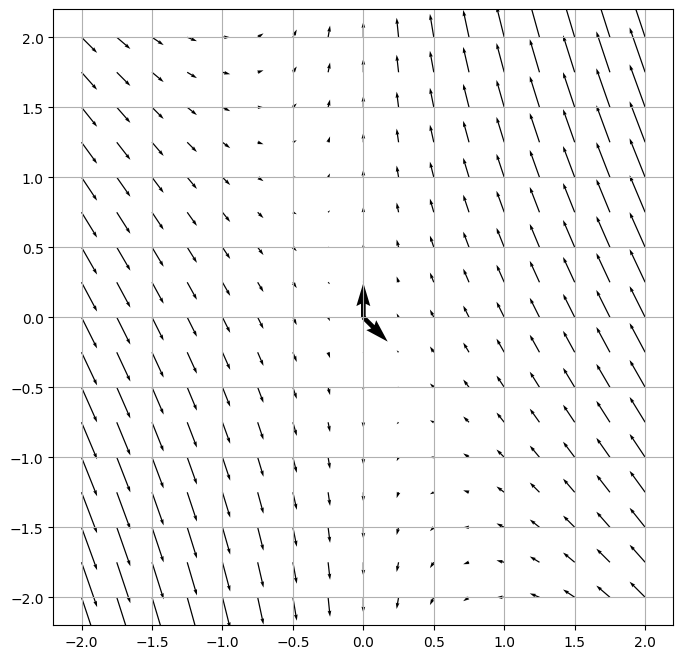

In [1]:
# phase portrait

import numpy as np
import matplotlib.pyplot as plt

X1,X2 = np.meshgrid(np.linspace(-2,2,17),np.linspace(-2,2,17))

#A = np.array([[0,1],[-1,0]])
A = np.array([[-1,0],[2,1]])
#A = np.array([[-0.5,1],[-1,0.5]])
dX = np.array([A.dot([x1,x2]) for (x1,x2) in zip(X1.ravel(),X2.ravel())])
dX1 = dX[:,0].reshape(X1.shape)
dX2 = dX[:,1].reshape(X2.shape)

D, Q = np.linalg.eig(A)
print(D)
print(Q)
plt.figure(figsize=(8,8), dpi=100)
plt.quiver(X1,X2,dX1,dX2, width=0.002)
plt.quiver(0,0,Q[0,0],Q[1,0])
plt.quiver(0,0,Q[0,1],Q[1,1])
plt.grid()
plt.show()

In [2]:
D,Q = np.linalg.eig(A)
print(f'D:{D}')
print(f'Q:{Q}')

D:[ 1. -1.]
Q:[[ 0.          0.70710678]
 [ 1.         -0.70710678]]


[0.+1.j 0.-1.j]
[[0.70710678+0.j         0.70710678-0.j        ]
 [0.        +0.70710678j 0.        -0.70710678j]]


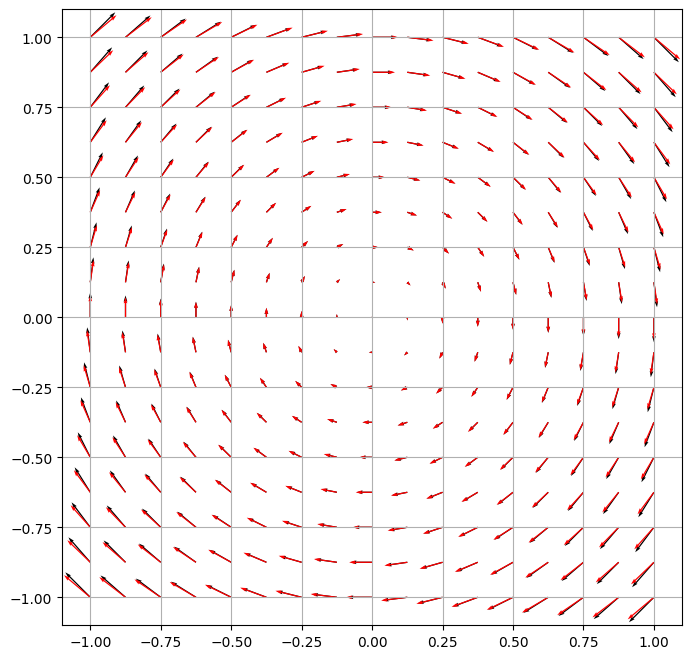

In [3]:
# phase portrait

import numpy as np
import matplotlib.pyplot as plt

X1,X2 = np.meshgrid(np.linspace(-2,2,17)/2,np.linspace(-2,2,17)/2)

A = np.array([[0,1],[-1,0]])
dX = np.array([A.dot([x1,x2]) for (x1,x2) in zip(X1.ravel(),X2.ravel())])
dX1 = dX[:,0].reshape(X1.shape)
dX2 = dX[:,1].reshape(X2.shape)

dX_ = np.array([[x2,-np.sin(x1)] for (x1,x2) in zip(X1.ravel(),X2.ravel())])
dX1_ = dX_[:,0].reshape(X1.shape)
dX2_ = dX_[:,1].reshape(X2.shape)

D, Q = np.linalg.eig(A)
print(D)
print(Q)
plt.figure(figsize=(8,8), dpi=100)
plt.quiver(X1,X2,dX1,dX2, width=0.002)
plt.quiver(X1,X2,dX1_,dX2_, width=0.002, color='r')
plt.grid()
plt.show()

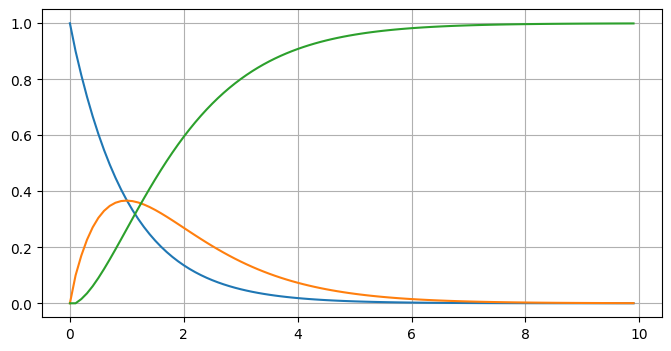

In [4]:
# chemical reaction
# using 2nd order Adams-Bashforth

def dx(x):
  A = np.array([[-1.,0,0],[1.,-1.,0],[0,1.,0]])
  return np.array(A.dot(x))

ic = [1.,0,0]
dt = 0.1
t = np.arange(0,10,dt)
state = []
state.append(ic)

deriv_p = dx(state[0])

for k in range(len(t)-1):
  x_cur = state[-1]
  deriv = dx(x_cur)
  x_new = x_cur + dt*(3*deriv - deriv_p)/2
  state.append( x_new )
  deriv_p = deriv

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,np.array(state))
plt.grid()
plt.show()

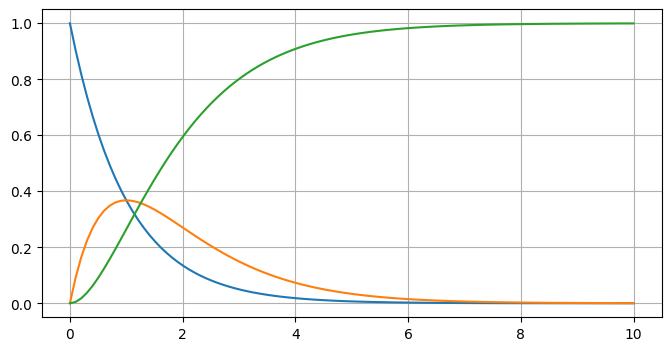

In [6]:
# chemical reaction
# using scipy.signal

from scipy import signal
a = np.array([[-1.,0,0],[1.,-1.,0],[0,1.,0]])
b = np.array([[1.],[0],[0]])
c = np.array([1.0,0,0])
d = np.array([0])
sys = signal.StateSpace(a, b, c, d)

t, yout, xout = signal.lsim(sys, U=0, T=np.linspace(0,10,100), X0=[1,0,0])

plt.figure(figsize=(8,4), dpi=100)
plt.plot(t,xout)
plt.grid()
plt.show()

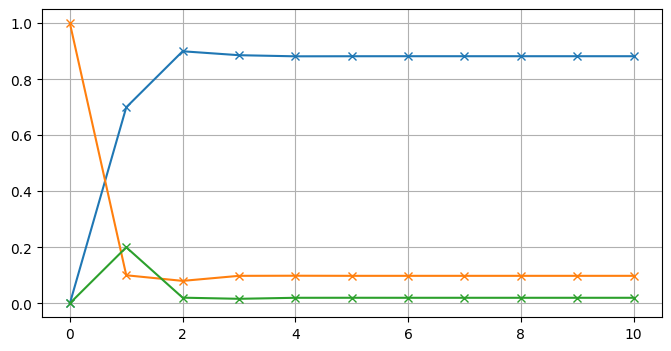

In [7]:
# Markov chain

p = np.array([0,1.0,0])
P = np.array([[0.9,0.7,1.0],[0.1,0.1,0],[0,0.2,0]])
p_history = []
p_history.append(p)

for k in range(10):
  p_cur = p_history[-1]
  p_new = P.dot(p_cur)
  p_history.append( p_new )

plt.figure(figsize=(8,4),dpi=100)
plt.plot(np.array(p_history), 'x-')
plt.grid()
plt.show()

In [8]:
D,Q = np.linalg.eig(P)
QQ = Q[:,0]/np.sum(Q[:,0])

print(f'eval:\n{D}')
print(f'q1:\n{QQ}')

eval:
[1.00000000e+00+0.j         1.90819582e-17+0.14142136j
 1.90819582e-17-0.14142136j]
q1:
[0.88235294+0.j 0.09803922+0.j 0.01960784+0.j]
